# Module 2 Project - Northwind Database 

# Final Project Submission

Please fill out:
* Student name: Bram Tunggala
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: Brandon Lewis
* Blog post URL: 


# Approach
Method: **OSEMN**

The OSEMN and Scientific method is used for the framework of this project. Starting with retriving and cleaning our data to avoid errors down the process. After that, Exploring the data to get a "feel" of what we're looking at intuitively, using visualizations and calling methods. Many iterations will be made in going back and forth between wrangling and exploring our data to prepare the data for modeling. Build and tweak models accordingly, in order to get best results. Then, interpret the results the best possible in order to answer the  questions or further the analysis. 

Method: **Scientific**
1. Define question 
2. Exploratory research 
    - Explore data 
3. Define hypothesis 
    - Define null and alternative hypothesis
    - Choose between using a one-tailed test (directional) or a two-tailed test (non-directional)
    - Set significance level $\alpha$ (alpha) - commonly set at 0.05
4. Statistical tests
    - Rationalize the appropriate statiscal test
    - Checking assumptions 
    - Calculating test statisctic and p-value 
    - Calculating effect size 
5. Conclusion(s)
    - Interpret outcome
    


<img src='Northwind_ERD.png'>

# Obtain our Data 
import necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# Importing sqlite database and checking table names
import sqlite3 as sq 
connection = sq.connect('Northwind_small.sqlite')
cur = connection.cursor()
cur.execute('''SELECT name FROM sqlite_master WHERE type = 'table';''').fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

## 1)
#### **Question:** Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount? 

**Null Hypothesis**: Discounts **does not** effect the number of products customers order.  
**Alternative Hypothesis**: Discounts **does** effect the number of products customers order. 

**Method:**
After obtaining our necessary data, I seperated the data into two dataframes, performed analysis of the number of  products purchased with/without discount and visualized the sum and mean of the data. I visually checked for normality using Q-Q plot and statistically, using SciPy's normaltest. After concluding that our data is not normal, I will use tests that performs well with unnormal data. Parametric tests will be performed because parametric tests can perform well with continuous data that aren't normally distributed, **if** you satisfy the sample size in the guidelines [here](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test) (1-sample t test, Greater than 20, ect.). I used the Welch's t-test because it performs well when assumption of normality isn't strong. 


In [3]:
# Selecting OrderDetail Table 
cur.execute('''SELECT * FROM orderdetail;''')
df_o_d = pd.DataFrame(cur.fetchall()) # creating pandas DataFrame
df_o_d.columns = [i [0] for i in cur.description] # label columns 

In [4]:
# Creating 2 differenct datasets, with and without discount
df_discount = df_o_d[df_o_d['Discount'] > 0 ]
df_no_discount = df_o_d[df_o_d['Discount'] == 0]

In [5]:
# A quick look at total and average quantity ordered
print("Total quantity ordered:",df_o_d['Quantity'].sum())
print("Total quantity ordered w/o Discount:",df_no_discount['Quantity'].sum())
print("Total quatinty ordered w/ Discount:",df_discount['Quantity'].sum())

# print("Average quantity ordered per Product w/o Discount:",df_no_discount.groupby('ProductId')['Quantity'].mean())
# print("Average quantity ordered per Product w/ Discount:",df_discount['Quantity'].sum())

print("Average quantity ordered w/o Discount:", round(df_no_discount['Quantity'].mean(),2))
print("Average quantity ordered w/ Discount:", round(df_discount['Quantity'].mean(),2))

Total quantity ordered: 51317
Total quantity ordered w/o Discount: 28599
Total quatinty ordered w/ Discount: 22718
Average quantity ordered w/o Discount: 21.72
Average quantity ordered w/ Discount: 27.11


## Visualization 

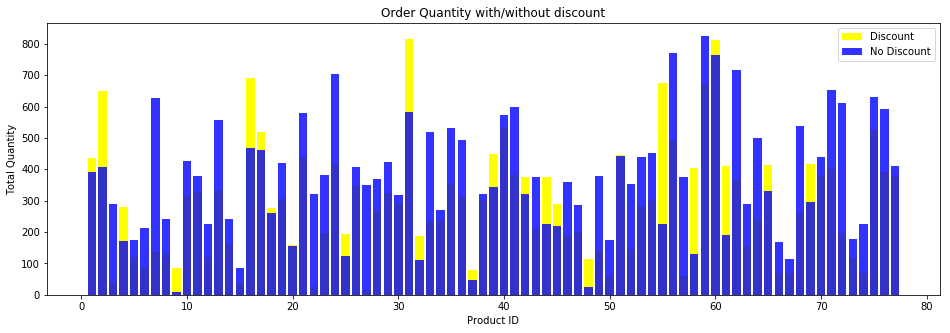

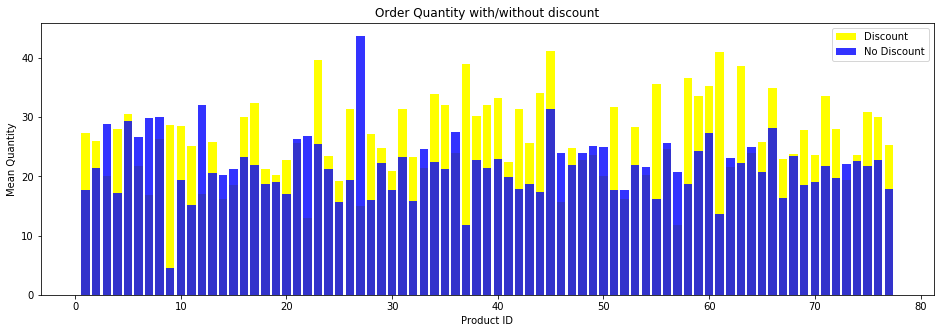

In [6]:
# Grouped by sum 
df_discount_sum = df_o_d[df_o_d['Discount'] > 0 ].groupby('ProductId')['Quantity'].sum()
df_no_discount_sum = df_o_d[df_o_d['Discount'] == 0].groupby('ProductId')['Quantity'].sum()

plt.figure(figsize=(16,5))
plt.bar(df_discount_sum.index, df_discount_sum.values, alpha=1, label='Discount', color='yellow')
plt.bar(df_no_discount_sum.index, df_no_discount_sum.values, alpha=0.8, label='No Discount', color='blue')
plt.legend()
plt.title('Order Quantity with/without discount')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity')
plt.show()

# Grouped by mean 
df_discount_mean = df_o_d[df_o_d['Discount'] > 0 ].groupby('ProductId')['Quantity'].mean()
df_no_discount_mean = df_o_d[df_o_d['Discount'] == 0].groupby('ProductId')['Quantity'].mean()

plt.figure(figsize=(16,5))
plt.bar(df_discount_mean.index, df_discount_mean.values, alpha=1, label='Discount', color='yellow')
plt.bar(df_no_discount_mean.index, df_no_discount_mean.values, alpha=0.8, label='No Discount', color='blue')
plt.legend()
plt.title('Order Quantity with/without discount')
plt.xlabel('Product ID')
plt.ylabel('Mean Quantity')
plt.show()

In [7]:
print("Avg. quantity with Discount:",round(df_discount_mean.values.mean(),2))
print("Avg. quantity w/o Discount:",round(df_no_discount_mean.values.mean(),2))

Avg. quantity with Discount: 26.43
Avg. quantity w/o Discount: 21.81


Based on intial exploritory data analysis, orders with discount, has higher quantity average per order versus without discount. An average quantity of 4 more per order. 

## Q-Q Plot (Quantile - Quantile) - visually checking for normality

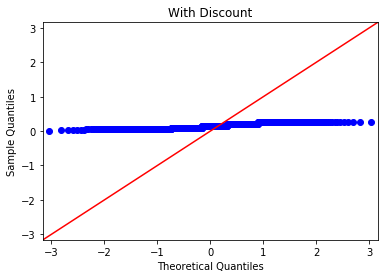

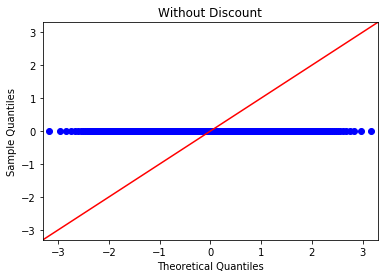

In [8]:
import numpy as np 
import statsmodels.api as sm
import pylab 

test_no = df_no_discount["Discount"]
test = df_discount["Discount"]
sm.qqplot(test, line='45')
pylab.title("With Discount")

sm.qqplot(test_no, line='45')
pylab.title("Without Discount")

pylab.show()



## Statistical Normality Test

In [9]:
from scipy.stats import normaltest
normaltest(df_discount["Discount"], nan_policy='omit') # checking for normalization 

NormaltestResult(statistic=2005.0894275024564, pvalue=0.0)

**Interpretation:** 
The result of the p-value <= $\alpha$ of 0.05, we can reject the H$_0$  or null hypothesis, therefore the distribution is not normal, which leads me to use The Welch's t-test below. 


## Welch's t test
We saw earlier that our data is unnormal. Here we are using The Welch's t-test vs. The Student t-test, because The student test assumes our data is normally distributed with samples having equal varience and sample size. The Welch's t-test is used when assumption of normalization don't hold strong. **Cohen's _d_:**
Here we are using the Cohen's _d_, one of the most common ways to measure effect size, to represent difference between two or more groups. In which, larger values represent greater differentiation between the two groups. 


In [10]:
# Function for Cohen's d 
def Cohen_d(group1, group2): 
    diff = group1.mean() - group2.mean()
    n1, n2, = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    
    # Calculate the pooled threshold 
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic 
    d = diff / np.sqrt(pooled_var)
    return abs(round(d,4))

In [11]:
from scipy import stats # for significance levels, normality 

alt = df_o_d[df_o_d['Discount'] > 0 ]["Quantity"]
null= df_o_d[df_o_d['Discount'] == 0]["Quantity"]

# Using welch_t Test
t_stat, p = stats.ttest_ind(null, alt)
d = Cohen_d(alt, null)

print("Cohen's d:", d)
print("p-value:", p)

Cohen's d: 0.2863
p-value: 1.1440924523215966e-10


## Observations:
The test results showed that discount has a statistical significance on the number of products customers order. A p-value of less than 0.05 declares some form of statistical significance therefore rejecting our null hyptohesis. Cohen's _d_ level of .28 which is defined as **"small" effect size**. 


**P-Value =** probability sample Means are the same 

**Confidence Level** or (1 - P) **=** probability sample Means are different 

**Effect Size =** how different sample means are 

Why Effect Size matters? 
In data analytics domain, effect size calculation serves three primary goals:

* Communicate **practical significance** of results. An effect might be statistically significant, but does it matter in practical scenarios ?

* Effect size calculation and interpretation allows you to draw **Meta-Analytical** conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tur effect size of the population. 

* Perform **Power Analysis** , which help determine the number of particicpants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one. 

**Interpretation:** 
In the above case, the average quantity order with/without discount is **26.43(discount) - 21.81(no discount)** = difference of **4.62**. Since there is no **standard scale** to measure this difference, Cohen's d provide a way to define, **How big of a difference is this?** As descibed in the observation, the result shows a cohen's d level of .28 which equals to having a **small effect/significance**.

Below I'll use the same approach as above on the statistical significance _(if any)_ on discount. 

In [12]:
#checking different types of discounts 
df_o_d['Discount'].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [13]:
discounts = df_discount['Discount'].unique()
discounts.sort()

# converting to a DataFrame
groups = {}
for i in discounts:
    groups[i] = df_discount[df_discount['Discount']==i]
    
# labelling columns    
discounts_df = pd.DataFrame(columns=['Discount %','Orders','Avg. Order Quantity'])
for i in groups.keys():
    discounts_df = discounts_df.append({'Discount %':i*100,'Orders':len(groups[i]),'Avg. Order Quantity':groups[i]['Quantity'].mean()}, ignore_index=True)

discounts_df

,Discount %,Orders,Avg. Order Quantity
0,1.0,1.0,2.000000
1,2.0,2.0,2.000000
2,3.0,3.0,1.666667
3,4.0,1.0,1.000000
4,5.0,185.0,28.010811
5,6.0,1.0,2.000000
6,10.0,173.0,25.236994
7,15.0,157.0,28.382166
8,20.0,161.0,27.024845
9,25.0,154.0,28.240260


Removing discounts with average quantity less than or equal to 2.0 

In [14]:
discounts_significance_df = pd.DataFrame(columns=['Discount %','p-value','Cohens d'], index=None)

discounts = [ 0.05, 0.1, 0.15, 0.2, 0.25]
control = df_o_d[df_o_d['Discount']==0]['Quantity']
for i in discounts:
    experimental = df_o_d[df_o_d['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = Cohen_d(experimental, control)
    discounts_significance_df = discounts_significance_df.append( { 'Discount %' : str(i*100)+'%', 'p-value': p, 'Cohens d' : d } , ignore_index=True)    

discounts_significance_df

,Discount %,p-value,Cohens d
0,5.0%,0.000011,0.3469
1,10.0%,0.015501,0.1959
2,15.0%,0.000011,0.3724
3,20.0%,0.000326,0.3007
4,25.0%,0.000018,0.3666


## Observations: 
The test results showed that discounts above has a **statistical significance** on the number of products customers order vs. orders without discount. A p-value of less than 0.05 declares some form of statistical significance therefore **rejecting our null hyptohesis**. Discounts 5%, 15%, 20%, 25% has a Cohen's d level of roughly 0.34 which is in between **small/medium effect size**. Discount of 10% has a Cohen's d level of 0.20 which is defined as small **effect size**. 

We can also conclude, that discount rate of 15% and 25% shows it has the largest effect size of the discounts offered. We can check with the average quantity ordered, with 15% and 25% discount average order quantity of 28.

## 2) 
#### **Question:** Is there a statistically significant difference in order size with discounts, between customers located in the USA and International customers? 

**Null Hypothesis**: There is no statistically significant difference in the number of discounted products purchased between USA and International customers.  
**Alternative Hypothesis**: There is a statistically significant difference in the number of discounted products purchased between USA and International customers. 

In [15]:
# Selecting table for USA 
cur.execute('''SELECT orderid, quantity, discount, productid, shipregion, shipcountry FROM [order] 
LEFT JOIN orderdetail ON [order].id = orderdetail.orderid WHERE shipcountry == 'USA' AND discount > '0';''')
usa = pd.DataFrame(cur.fetchall())
usa.columns = [i[0] for i in cur.description]
usa.head()

,OrderId,Quantity,Discount,ProductId,ShipRegion,ShipCountry
0,10262,12,0.20,5,North America,USA
1,10269,60,0.05,33,North America,USA
2,10269,20,0.05,72,North America,USA
3,10305,25,0.10,18,North America,USA
4,10305,25,0.10,29,North America,USA


In [16]:
# Selecting table for International 
cur.execute('''SELECT orderid, quantity, discount, productid, shipregion, shipcountry FROM [order] LEFT JOIN orderdetail ON [order].id = orderdetail.orderid WHERE shipcountry != 'USA' AND discount > '0';''')
international = pd.DataFrame(cur.fetchall())
international.columns = [i[0] for i in cur.description]
international.head()

,OrderId,Quantity,Discount,ProductId,ShipRegion,ShipCountry
0,10250,35,0.15,51,South America,Brazil
1,10250,15,0.15,65,South America,Brazil
2,10251,6,0.05,22,Western Europe,France
3,10251,15,0.05,57,Western Europe,France
4,10252,40,0.05,20,Western Europe,Belgium


In [17]:
Total_USA = usa.Quantity.sum()
Total_Inter = international.Quantity.sum()

Mean_USA = usa.Quantity.mean()
Mean_Inter = international.Quantity.mean()

avg_USA = usa.Discount.sum() / len(usa)
avg_Inter = international.Discount.sum() / len(international)

print(f'Average discount Int: {round(avg_Inter *100, 2)}%')
print(f'Average discount USA: {round(avg_USA *100, 2)}%')
print("\n")
print(f'Avg. Qty purchased USA: {round(Mean_USA,2)}\nAvg. Qty purchased Int {round(Mean_Inter,2)}')


Average discount Int: 14.38%
Average discount USA: 14.75%


Avg. Qty purchased USA: 30.03
Avg. Qty purchased Int 26.51


## Visualization 

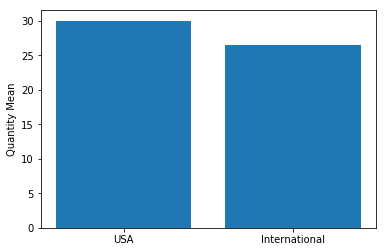

In [18]:
x = np.arange(2)
to_plot = pd.Series([Mean_USA, Mean_Inter])
y = to_plot 

fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ("USA", "International"))
plt.ylabel("Quantity Mean")
plt.show()

## Observations:
Customers in the USA purchase more discounted goods per order than International customers by an average quantity of 4. The average discount between USA and International purchase is similar. Let's do some more digging to see if there is statiscally significant difference between the two. 

Using The **Welch t test** below. 

In [19]:
alt = usa["Quantity"]
null= international["Quantity"]

# Welch_t Test
t_stat, p = stats.ttest_ind(null, alt)
d = Cohen_d(alt, null)

print("Cohen's d:", d)
print("p-value:", p)

Cohen's d: 0.1694
p-value: 0.06616161223342422


## Observations:
The result of the test shows there is no statiscally significant difference in order size with discounts, with customers located in the USA vs. International customers. A with p-value of 0.066, we cannot reject our null hypothesis. I was surprised with this discovery because USA had an average order of 30 vs. International average order of 26. I was curious to see why this was the case, and decided to use the one-way ANOVA test to further explore below. 

In [20]:
fstat, pval = stats.f_oneway(null, alt)
print(f'F-Value: {round(fstat,4)}\np-value: {round(pval,6)}')

F-Value: 3.3846
p-value: 0.066162


## Visualization 

In [21]:
def visualization(control, experimental):
    plt.figure(figsize=(10,6))
    sns.distplot(experimental, bins=30,  label='International')
    plt.axvline(x=experimental.mean(), color='k', linestyle='--', label="International Mean")
    
    sns.distplot(control, bins=30,  label='USA')
    plt.axvline(x=control.mean(), color='red', linestyle='--', label="USA Mean")
   
    plt.title('USA and International Sample Distributions', fontsize=14)
    plt.xlabel('Distributions')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


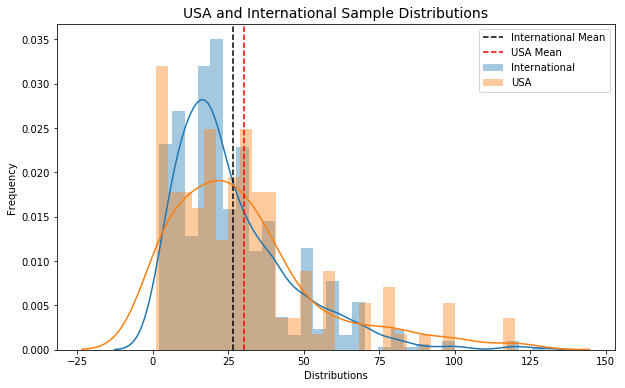

In [22]:
visualization(usa.Quantity, international.Quantity)

**Interpretation:** Using the ANOVA test, we still received the the same p-value, which resulted insignificant. The **F-value** shows the variability of group means. A low F-value, the closer together (low variability) the group means are (shown in visualization below). In order to reject the null hypothesis, we need a high F-Value. To determine if our F-value is high enough, we need to use the F-distribution to calculate probabilities and take multiple samples. In this case, I will rely on the p-value and conclude that the F-value is low, therefore we **cannot** reject the null hypothesis. 

## 3.1 Question No.3
#### Is there a statistically significant difference in discount between categories? 

**Null Hypothesis**: There is no statistical difference in discount levels between categories.

**Alternative Hypothesis**: There is statistical difference in discount levels between categories. 

**Method:**
I formed a table consisting of the fields (columns) needed, performed intial exploritory analysis and filtered the data I need in order to perform tests. I checked for normality using the shapiro's test. After concluding that our data is not normal, I used the Welch's t-test because it performs well when assumption of normality isn't strong. I used Cohen's d to determine the effect size. 


In [23]:
# Selecting Table
cur.execute(''' SELECT OrderDetail.UnitPrice, Discount, CategoryId FROM OrderDetail JOIN Product ON OrderDetail.ProductId = Product.Id''')
dis = pd.DataFrame(cur.fetchall()) # creating pandas DataFrame
dis.columns = [i [0] for i in cur.description] # label columns 
dis.head()

,UnitPrice,Discount,CategoryId
0,14.0,0.0,4
1,9.8,0.0,5
2,34.8,0.0,4
3,18.6,0.0,7
4,42.4,0.0,7


## Statistical Normality Test

In [24]:
normaltest(dis["Discount"], nan_policy='omit') # checking for normalization 

NormaltestResult(statistic=338.4715340098758, pvalue=3.1757057039953526e-74)

**Interpretation:** 
The result of the p-value <= $\alpha$ of 0.05, we can reject the H$_0$  or null hypothesis, therefore the distribution is not normal. I'll use the ANOVA two-way test. 

In [26]:
from statsmodels.formula.api import ols

formula = 'Discount ~ C(CategoryId)'
lm = ols(formula, dis).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq      df         F    PR(>F)
C(CategoryId)   0.074918     7.0  1.539545  0.149326
Residual       14.925422  2147.0       NaN       NaN


In [27]:
fstat, pval = stats.f_oneway(null, alt)
print(f'F-Value: {round(fstat,4)}\np-value: {round(pval,6)}')

F-Value: 3.3846
p-value: 0.066162


# Observations: 
The result shows there is no statiscally signifcant difference in discount levels between categories. 

## 4.1 Question No.4
#### Is there a statistically significant difference in purchases on imported products vs. domestic products? 

**Null Hypothesis**: People do not spend more on imported goods. 

**Alternative Hypothesis**: People spend more money on imported goods. 

**Method:**
I formed a table consisting of the fields (columns) needed, performed intial exploritory analysis and filtered the data I need in order to perform tests. I checked for normality using the shapiro's test. After concluding that our data is not normal, I used the Welch's t-test because it performs well when assumption of normality isn't strong. I used Cohen's d to determine the effect size. 


In [28]:
# Selecting Table
cur.execute('''SELECT p.Id product_id, p.ProductName product_name, s.Id supplier_id, 
                            s.Country supplier_country, s.Region supplier_region, od.Quantity order_quantity,
                            od.UnitPrice unit_price, c.Id customer_id, c.Country customer_country, 
                            c.Region customer_region
                            FROM Supplier s
                            JOIN Product p ON s.Id = p.SupplierId
                            JOIN OrderDetail od ON p.Id = od.ProductId
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Customer c ON o.CustomerId = c.Id;''')
data = pd.DataFrame(cur.fetchall()) # creating pandas DataFrame
data.columns = [i [0] for i in cur.description] # label columns 
data.head()

,product_id,product_name,supplier_id,supplier_country,supplier_region,order_quantity,unit_price,customer_id,customer_country,customer_region
0,11,Queso Cabrales,5,Spain,Southern Europe,12,14.0,VINET,France,Western Europe
1,42,Singaporean Hokkien Fried Mee,20,Singapore,South-East Asia,10,9.8,VINET,France,Western Europe
2,72,Mozzarella di Giovanni,14,Italy,Southern Europe,5,34.8,VINET,France,Western Europe
3,14,Tofu,6,Japan,Eastern Asia,9,18.6,TOMSP,Germany,Western Europe
4,51,Manjimup Dried Apples,24,Australia,NSW,40,42.4,TOMSP,Germany,Western Europe


In [29]:
# Whenever supplier_country and customer_country match,
# adding new column "country_preference" 
data['country_preference'] = np.where(data['supplier_country'] == data['customer_country'], 'Domestic', 'Imported')
data['country_preference'].value_counts()

Imported    1945
Domestic     133
Name: country_preference, dtype: int64

In [30]:
# adding column with amount spent, domestic spending and import spending.
data['spending'] = np.multiply(data['order_quantity'], data['unit_price'])
data['domestic_spending'] = np.where(data['country_preference'] == 'Domestic', data['spending'], 0)
data['import_spending'] = np.where(data['country_preference'] == 'Imported', data['spending'], 0)

In [31]:
# drop all columns we don't need and group by customer
data_test = data[['customer_id', 'domestic_spending', 'import_spending']]
data_test = data_test.groupby('customer_id').sum()

Domestic: $ 84322.13
Imported: $ 1227318.91


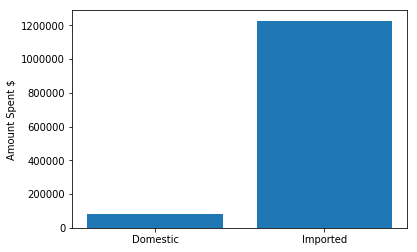

In [46]:
# visualizing domestic vs imported spending 
d = data_test['domestic_spending'].sum()
i = data_test['import_spending'].sum()
print("Domestic: $",d)
print("Imported: $",i)

x = np.arange(2)
to_plot = pd.Series([d, i])
y = to_plot 

fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, ("Domestic", "Imported"))
plt.ylabel("Amount Spent $")
plt.show()

In [47]:
# creating customer count 
cust_count = len(data.customer_id.unique())
cust_count
# Avg. spending per customer 
print(f'Avg. Domestic goods spending per customer ${round(d/cust_count,2)}')
print(f'Avg. Imported goods spending per customer ${round(i/cust_count,2)}')

Avg. Domestic goods spending per customer $992.03
Avg. Imported goods spending per customer $14439.05


In [33]:
data_test.describe()

,domestic_spending,import_spending
count,85.000000,85.000000
mean,992.025059,14439.046000
std,2492.621520,20755.854523
min,0.000000,100.800000
25%,0.000000,3172.160000
50%,72.000000,7310.620000
75%,502.000000,17538.400000
max,17755.290000,113236.680000


# Observations: 
From the graph above, people spend more on imported products vs. domestic products. Let's try to define the statistical significance of the difference. 

## Shapiro's Test 

In [34]:
# testing for normality using shapiro test
from scipy import stats
print("Domestic:",stats.shapiro(data['domestic_spending']))
print("Import:",stats.shapiro(data['import_spending']))

Domestic: (0.13910329341888428, 0.0)
Import: (0.4673398733139038, 0.0)


Shapiro's test is statistically significant which indicates the data is not normally distributed. We will use The Welch's t test for this reason, because the Welch's t test is used when variences are unequal. 

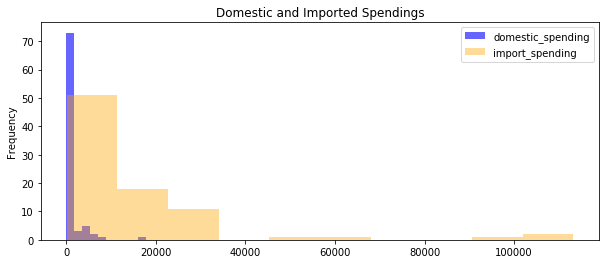

In [35]:
# additional histograms for visual inspection for what we already know about data not normally distributed 
plt.figure(figsize=(10,4))
data_test['domestic_spending'].plot(kind='hist', color='blue', alpha=0.6, legend=True)
data_test['import_spending'].plot(kind='hist',  color='orange', alpha=0.4, legend=True)
plt.title('Domestic and Imported Spendings');

In [36]:
alt = data["domestic_spending"]
null= data["import_spending"]

# Welch_t Test
t_stat, p = stats.ttest_ind(null, alt)
d = Cohen_d(alt, null)

print("Cohen's d:", d)
print("p-value:", p)

Cohen's d: 0.7337
p-value: 4.063262977946454e-116


# Observations:
In conclusion, we proved that there is statistically significant difference in customers purchasing imported goods vs. domestic goods. The null hypothesis is rejected because we received a p-value of less than the significance alpha level of 0.05. The Cohen's d level of 0.73 is considered a **large effect size**. This supports our intial outlook on customers spending more on imported goods vs. domestic goods, and therfore the alternitive hypothesis is accepted. 

# Further Analysis: 

I'd like to dig in further into the details of the imported/domestic information. Specifically, I'd like to break down per year, per quarter, per month and see if there is correlation in seasonality and goods purchased, also to investigate if imported/domestic goods 
revenue are increasing or decreasing annually. Also, i'd like to test if discounts on imported/domestic products, has an effect on order quantity. 
